In [2]:
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import imp

In [3]:
DATA_PATH = '/Users/Jamin/LocalData/ForceSMIP/'
MODEL_PATH = 'CESM2/'


In [4]:
for ii, member_fn in enumerate(os.listdir(DATA_PATH + MODEL_PATH)):
    dm = xr.open_dataset(DATA_PATH + MODEL_PATH + member_fn)
    dm = dm.groupby("time.year").mean()

    if ii == 0:
        # add member dimension
        ds = dm.expand_dims(dim={"member": 1}, axis=0)
    else:
        ds = xr.concat([ds, dm], dim="member")


In [5]:
lat = ds.lat
lon = ds.lon
dA = ds['tos'].values
dF = np.stack(dA.shape[0]*[ds['tos'].mean(dim=["member"]).values])
dI = dA - dF

In [6]:
Xtrain = dA[:20,...].reshape(-1, len(lat), len(lon))
Xval = dA[20:,...].reshape(-1, len(lat), len(lon))

Ttrain = dI[:20,...].reshape(-1, len(lat), len(lon))
Tval = dI[20:,...].reshape(-1, len(lat), len(lon))

Ftrain = dF[:20,...].reshape(-1, len(lat), len(lon))
Fval = dF[20:,...].reshape(-1, len(lat), len(lon))

In [7]:
# normalize
Xtrain = (Xtrain - np.nanmean(Xtrain, axis=0))/np.nanstd(Xtrain, axis=0)
Xval = (Xval - np.nanmean(Xtrain, axis=0))/np.nanstd(Xtrain, axis=0)

Ttrain = (Ttrain - np.nanmean(Ttrain))/np.nanstd(Ttrain)
Tval = (Tval - np.nanmean(Ttrain))/np.nanstd(Ttrain)

Ftrain = (Ftrain - np.nanmean(Ftrain))/np.nanstd(Ftrain)
Fval = (Fval - np.nanmean(Ftrain))/np.nanstd(Ftrain)

/var/folders/n0/lbfykggx3_qfdp76fhhbtk_80000gn/T/ipykernel_44590/1281057889.py:2: RuntimeWarning: Mean of empty slice
  Xtrain = (Xtrain - np.nanmean(Xtrain, axis=0))/np.nanstd(Xtrain, axis=0)
/Users/Jamin/miniforge3/envs/temp/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/n0/lbfykggx3_qfdp76fhhbtk_80000gn/T/ipykernel_44590/1281057889.py:3: RuntimeWarning: Mean of empty slice
  Xval = (Xval - np.nanmean(Xtrain, axis=0))/np.nanstd(Xtrain, axis=0)


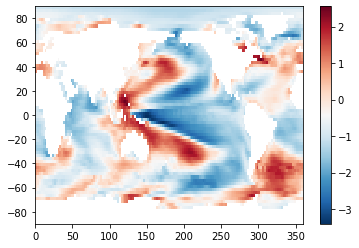

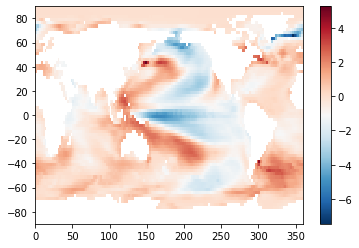

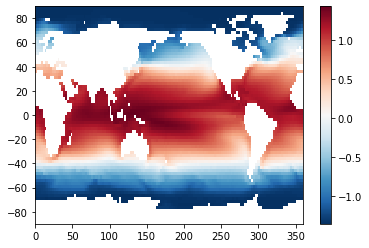

In [8]:
plt.pcolormesh(lon,lat, Xtrain[0], cmap = 'RdBu_r')
plt.colorbar()
plt.show()
plt.pcolormesh(lon,lat, Ttrain[0], cmap = 'RdBu_r')
plt.colorbar()
plt.show()
plt.pcolormesh(lon,lat, Ftrain[0], cmap = 'RdBu_r')
plt.colorbar()
plt.show()

In [21]:
import VED
imp.reload(VED)

<module 'VED' from '/Users/Jamin/Library/CloudStorage/GoogleDrive-jaminrader.science@gmail.com/My Drive/2023/ForceSMIP/ForceSMIP/VED.py'>

In [22]:
settings = { 
    'encoding_nodes' : [20, 20, 10],
    'code_nodes' : 1,
    'activation' : 'linear',
    'seed' : 0,  
}

In [23]:
ved, encoder, decoder = VED.build_VED(Xtrain, settings)

In [24]:
ved